# Predicciones de ventas
## Cargando datos e importando pandas

In [1]:
import pandas as pd
filename='/Users/matiasinostrozacifuentes/Desktop/solutions/predicciones-ventas/Data/sales_predictions.csv'
predicciones_df= pd.read_csv(filename)

primeras impresiones del data

In [2]:
predicciones_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
predicciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Existen dos columnas que tienen datos faltantes:
* Item_Weight tiene 1463 NaN
* Outlet_Size tiene 2410 NaN

In [4]:
predicciones_df.loc[ predicciones_df['Item_Weight'].isna(), :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Ordenando el dataset por identificador

In [5]:
predicciones_df=predicciones_df.sort_values(by=['Item_Identifier','Item_Weight'])
predicciones_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


In [6]:
predicciones_df.loc[predicciones_df['Item_Identifier']=="DRK37", :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
599,DRK37,5.0,Low Fat,0.044005,Soft Drinks,188.853,OUT046,1997,Small,Tier 1,Supermarket Type1,5502.837
3687,DRK37,5.0,Low Fat,0.000000,Soft Drinks,189.853,OUT045,2002,NaN,Tier 2,Supermarket Type1,4933.578
7568,DRK37,5.0,LF,0.000000,Soft Drinks,190.453,OUT010,1998,NaN,Tier 3,Grocery Store,379.506
1046,DRK37,NaN,Low Fat,0.077047,Soft Drinks,189.453,OUT019,1985,Small,Tier 1,Grocery Store,759.012
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.053,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.849


In [7]:
predicciones_df_sort=predicciones_df

Cantidad de identificadores unicos

In [8]:
predicciones_df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

Reasignando la columna Item Weight con valores 

In [9]:
predicciones_df_sort['Item_Weight']=predicciones_df_sort.loc[:,'Item_Weight'].fillna(method='ffill')
predicciones_df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 118 to 7166
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [10]:
predicciones_df.loc[predicciones_df['Item_Identifier']=="FDP10", :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464
7,FDP10,19.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [11]:
predicciones_df_sort.groupby(['Item_Identifier','Item_Weight'],).count()

,,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Item_Weight,,,,,,,,,,
DRA12,11.600,6,6,6,6,6,6,3,6,6,6
DRA24,19.350,7,7,7,7,7,7,5,7,7,7
DRA59,8.270,8,8,8,8,8,8,6,8,8,8
DRB01,7.390,3,3,3,3,3,3,3,3,3,3
DRB13,6.115,5,5,5,5,5,5,3,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
NCZ30,6.590,7,7,7,7,7,7,4,7,7,7
NCZ41,19.850,5,5,5,5,5,5,3,5,5,5
NCZ42,10.500,5,5,5,5,5,5,3,5,5,5


---
Ocupando la misma manera que en la parte de arriba, se ordenará el dataset por el ID de cada tienda y con esto se podrá saber los datos faltantes para cada tipo de tienda

In [12]:
predicciones_df=predicciones_df.sort_values(by=['Outlet_Identifier','Outlet_Size'])
predicciones_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.600,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
4130,DRA24,19.350,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
8371,DRA59,8.270,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,NaN,Tier 3,Grocery Store,185.0924
2479,DRB13,6.115,Regular,0.011791,Soft Drinks,189.0530,OUT010,1998,NaN,Tier 3,Grocery Store,948.7650
8063,DRB25,12.300,Low Fat,0.116261,Soft Drinks,107.0938,OUT010,1998,NaN,Tier 3,Grocery Store,214.3876
...,...,...,...,...,...,...,...,...,...,...,...,...
74,NCZ18,7.825,low fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
4418,NCZ30,6.590,Low Fat,0.026226,Household,119.0098,OUT049,1999,Medium,Tier 1,Supermarket Type1,2530.7058
6488,NCZ42,10.500,LF,0.011305,Household,235.5248,OUT049,1999,Medium,Tier 1,Supermarket Type1,4740.4960
6879,NCZ53,9.600,Low Fat,0.024515,Health and Hygiene,189.2214,OUT049,1999,Medium,Tier 1,Supermarket Type1,3956.8494


In [13]:
predicciones_df.loc[predicciones_df['Outlet_Identifier']=="OUT010", :].nunique()

Item_Identifier              555
Item_Weight                  248
Item_Fat_Content               5
Item_Visibility              521
Item_Type                     16
Item_MRP                     548
Outlet_Identifier              1
Outlet_Establishment_Year      1
Outlet_Size                    0
Outlet_Location_Type           1
Outlet_Type                    1
Item_Outlet_Sales            391
dtype: int64

El metodo no funcionó debido a que toda una tienda no entregó sus valores de tamaño, por ende no es factible realizar el mismo metodo que en el anterior

Separando la columna Outlet_size por dummies

In [14]:
dummie=pd.get_dummies(data=predicciones_df_sort, columns = ["Outlet_Size"])
dummie.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Tier 2,Supermarket Type1,2552.6772,0,0,0
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Tier 2,Supermarket Type1,3829.0158,0,0,0
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,Tier 3,Supermarket Type1,2552.6772,1,0,0
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Tier 2,Supermarket Type1,992.7078,0,0,1
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Tier 3,Supermarket Type2,850.8924,0,1,0


identificando los NaN de los Outlet_Size

In [15]:
#La cantidad que más se repite por Outlet_size
dummie[['Outlet_Size_High','Outlet_Size_Medium','Outlet_Size_Small']].sum()

Outlet_Size_High       932
Outlet_Size_Medium    2793
Outlet_Size_Small     2388
dtype: int64

In [16]:
dummie.groupby(['Item_Identifier'])[['Outlet_Size_High','Outlet_Size_Medium','Outlet_Size_Small']].sum()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
Item_Identifier,,,
DRA12,1,1,1
DRA24,1,2,2
DRA59,1,3,2
DRB01,1,2,0
DRB13,1,1,1
...,...,...,...
NCZ30,1,2,1
NCZ41,1,1,1
NCZ42,1,1,1


In [17]:
dummie.loc[(dummie['Outlet_Size_High']==0)&(dummie['Outlet_Size_Medium']==0)&(dummie['Outlet_Size_Small']==0)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Tier 2,Supermarket Type1,2552.6772,0,0,0
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Tier 2,Supermarket Type1,3829.0158,0,0,0
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Tier 3,Grocery Store,283.6308,0,0,0
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,Tier 2,Supermarket Type1,1146.5076,0,0,0
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Tier 3,Grocery Store,327.5736,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,NCZ42,10.50,Low Fat,0.000000,Household,238.3248,OUT010,1998,Tier 3,Grocery Store,711.0744,0,0,0
1115,NCZ42,10.50,Low Fat,0.011352,Household,236.5248,OUT017,2007,Tier 2,Supermarket Type1,4029.4216,0,0,0
4924,NCZ53,9.60,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,Tier 3,Grocery Store,376.8428,0,0,0
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Tier 3,Grocery Store,324.9104,0,0,0


Aquí tomé la decisión de eliminar el resto de los NaN porque es dificil determinar con presición cual puede ser el tipo de tienda

In [18]:
predicciones_without_nan=predicciones_df_sort.loc[:,:].dropna(how="any")
predicciones_without_nan

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


Algunos resumenes Estadisticos

In [19]:
predicciones_without_nan.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.912292,0.064505,141.256859,1995.794373,2322.688445
std,4.668038,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,8.785000,0.026681,94.012000,1987.000000,974.731200
50%,12.650000,0.052811,143.178600,1997.000000,1928.156800
75%,17.000000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


---
Ahora realizando algunas visualizaciones de productos para ver que tal están 

In [20]:
import matplotlib.pyplot as plt
from numpy.random import randn

In [21]:
mean_vis=0.064505
desv_vis=0.050092
x=mean_vis+desv_vis*randn(6113)
num_bins=10


In [22]:
Ventas_porlocal=predicciones_without_nan.groupby('Outlet_Type')['Item_Outlet_Sales'].count()
Ventas_porlocal.index

Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')

### First visualization with matplotlib

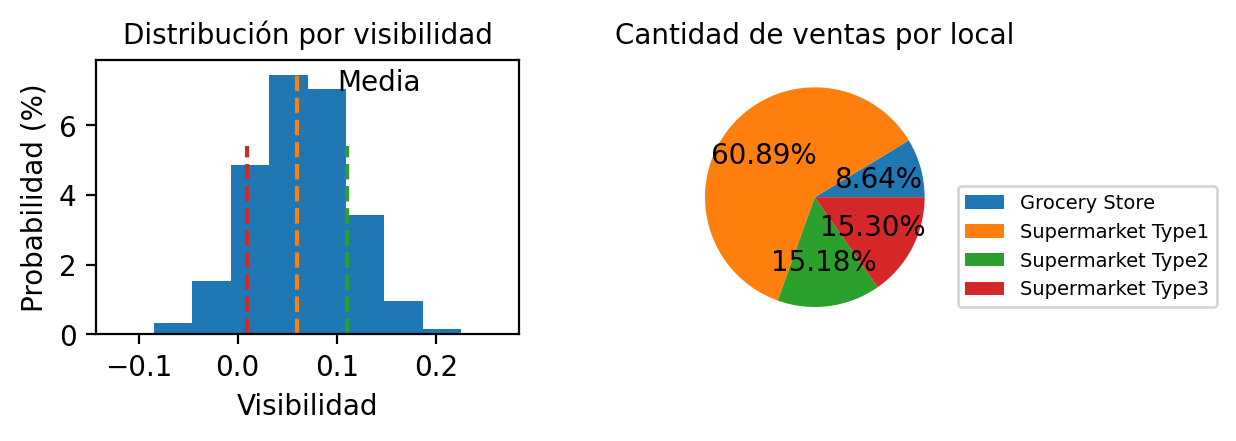

In [23]:
fig = plt.figure(dpi=200)
 #para ajustar los gráficos
ax1 = fig.add_subplot(2,2,1)
ax1.hist(x,num_bins,density=True)
ax1.set_xlabel('Visibilidad')
ax1.set_ylabel('Probabilidad (%)')
ax1.plot([0.06,0.06],[0,7.5],'--')
ax1.plot([0.06+desv_vis,0.06+desv_vis],[0,5.4],"--")
ax1.plot([0.06-desv_vis,0.06-desv_vis],[0,5.4],"--")
ax1.annotate('Media', xy=(0.06,7.5), xytext=(0.1,7))
ax1.set_title('Distribución por visibilidad',fontsize=10)


ax2=fig.add_subplot(2,2,2)
ax2.pie(Ventas_porlocal.values,autopct="%.2f%%")
ax2.legend(Ventas_porlocal.index,loc=[1.02,0.1],fontsize=7)
ax2.set_title('Cantidad de ventas por local',fontsize=10)
plt.rcParams['figure.constrained_layout.use'] = True




### Installation of cyberpunk with a visualization

In [24]:
!pip install mplcyberpunk

In [25]:
import mplcyberpunk


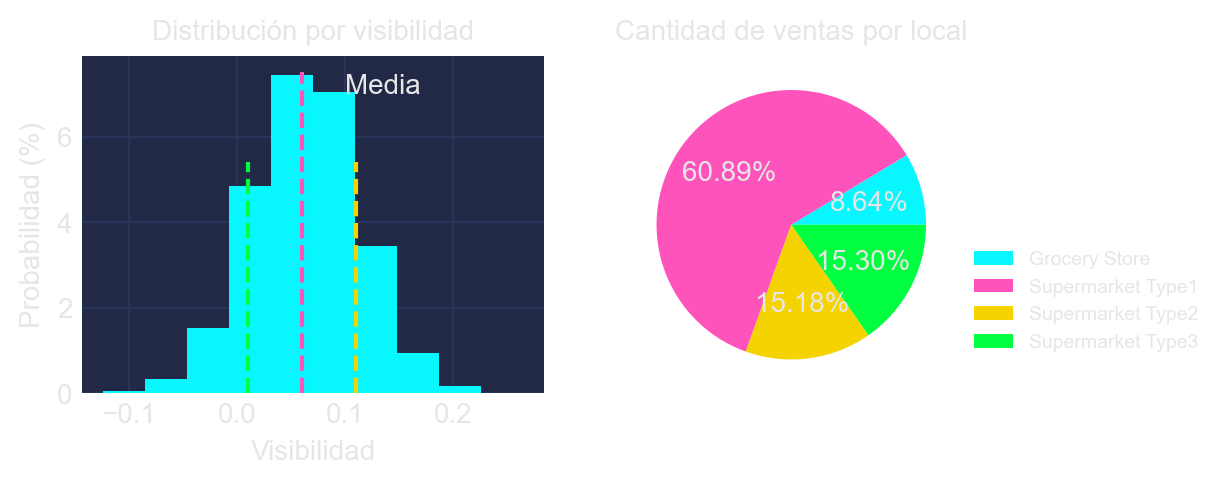

In [26]:
fig = plt.figure(dpi=200)
plt.style.use('cyberpunk')
 #para ajustar los gráficos
ax1 = fig.add_subplot(2,2,1)
ax1.hist(x,num_bins,density=True)
ax1.set_xlabel('Visibilidad')
ax1.set_ylabel('Probabilidad (%)')
ax1.plot([0.06,0.06],[0,7.5],'--')
ax1.plot([0.06+desv_vis,0.06+desv_vis],[0,5.4],"--")
ax1.plot([0.06-desv_vis,0.06-desv_vis],[0,5.4],"--")
ax1.annotate('Media', xy=(0.06,7.5), xytext=(0.1,7))
ax1.set_title('Distribución por visibilidad',fontsize=10)


ax2=fig.add_subplot(2,2,2)
ax2.pie(Ventas_porlocal.values,autopct="%.2f%%")
ax2.legend(Ventas_porlocal.index,loc=[1.02,0.1],fontsize=7)
ax2.set_title('Cantidad de ventas por local',fontsize=10)
plt.rcParams['figure.constrained_layout.use'] = True

#mplcyberpunk.add_glow_effects()


### Creating graphs and viewing the data with seaborn

In [27]:
import seaborn as sns

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_41716/2569146433.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


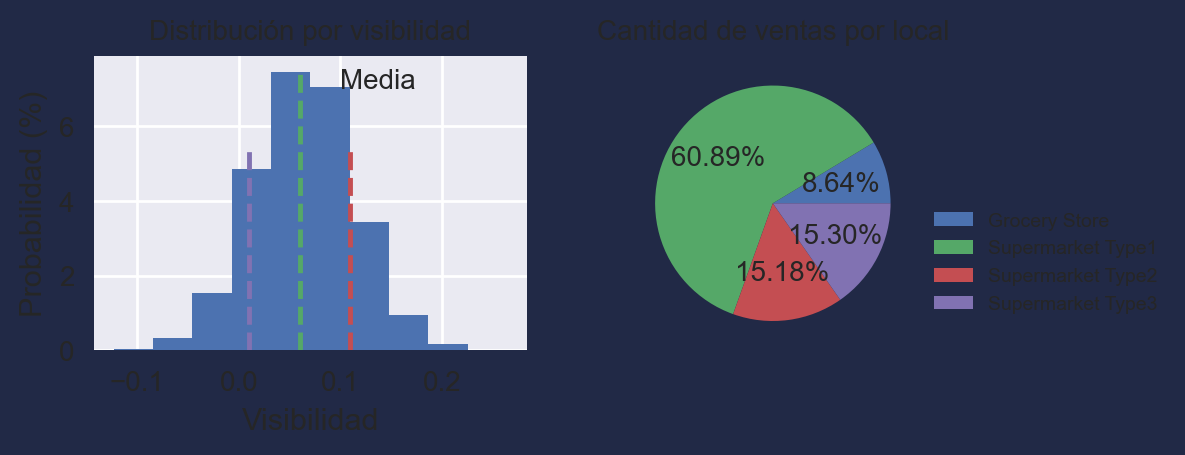

In [28]:
fig = plt.figure(dpi=200)
 #para ajustar los gráficos
plt.style.use('seaborn')
ax1 = fig.add_subplot(2,2,1)
ax1.hist(x,num_bins,density=True)
ax1.set_xlabel('Visibilidad')
ax1.set_ylabel('Probabilidad (%)')
ax1.plot([0.06,0.06],[0,7.5],'--')
ax1.plot([0.06+desv_vis,0.06+desv_vis],[0,5.4],"--")
ax1.plot([0.06-desv_vis,0.06-desv_vis],[0,5.4],"--")
ax1.annotate('Media', xy=(0.06,7.5), xytext=(0.1,7))
ax1.set_title('Distribución por visibilidad',fontsize=10)


ax2=fig.add_subplot(2,2,2)
ax2.pie(Ventas_porlocal.values,autopct="%.2f%%")
ax2.legend(Ventas_porlocal.index,loc=[1.02,0.1],fontsize=7)
ax2.set_title('Cantidad de ventas por local',fontsize=10)
fig.tight_layout()


Aqui se puede apreciar que la probabilidad de que en la poblacion total de productos, el 60% de esta su probabilidad de visibilidad está dentro de un 0 a un 10%. 
Mientras que en cuanto al nivel de venta de un producto, el que reporta más ventas por producto vendido es el tipo de local de supermarket Type 1, llegando a casí un 61% del total de todos los productos vendidos. 

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)


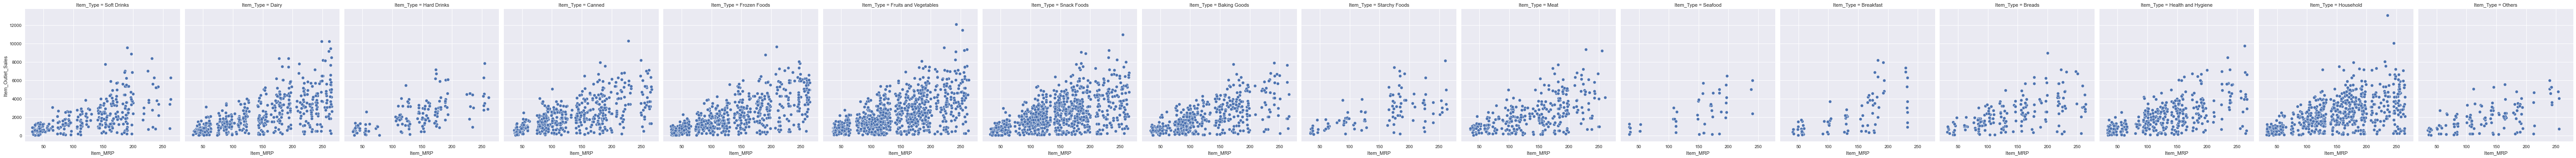

In [29]:

sns.relplot(data=predicciones_without_nan,x='Item_MRP',y='Item_Outlet_Sales',col='Item_Type')


aquí podemos apreciar que entre menor sea el precio unitario a minorista, este presenta una clara concentración de ventas que si fuese un mayor. En casi todos los tipos de productos esto se cumple con excepcion a algunos donde hay ventas pero son muy pequeñas.

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)


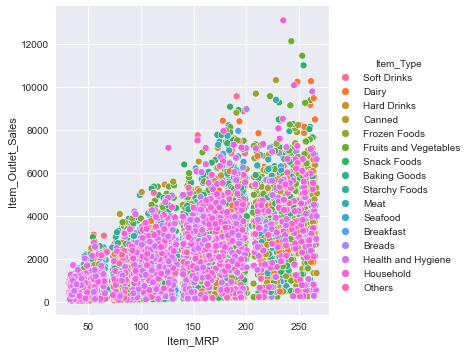

In [30]:
sns.relplot(data=predicciones_without_nan,x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Type')


## Parte 4
Hacer histogramas
hacer diagramas de cajas
quizas mapitas de calor

In [31]:
predicciones_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 1245 to 7166
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 749.9+ KB


In [32]:
predicciones_without_nan.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
predicciones_without_nan.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.912292,0.064505,141.256859,1995.794373,2322.688445
std,4.668038,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,8.785000,0.026681,94.012000,1987.000000,974.731200
50%,12.650000,0.052811,143.178600,1997.000000,1928.156800
75%,17.000000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
data=pd.DataFrame(predicciones_without_nan.dtypes)
data=data.reset_index()
data

,index,0
0,Item_Identifier,object
1,Item_Weight,float64
2,Item_Fat_Content,object
3,Item_Visibility,float64
4,Item_Type,object
5,Item_MRP,float64
6,Outlet_Identifier,object
7,Outlet_Establishment_Year,int64
8,Outlet_Size,object
9,Outlet_Location_Type,object


In [35]:
data.loc[data[0]!='object',:]

,index,0
1,Item_Weight,float64
3,Item_Visibility,float64
5,Item_MRP,float64
7,Outlet_Establishment_Year,int64
11,Item_Outlet_Sales,float64


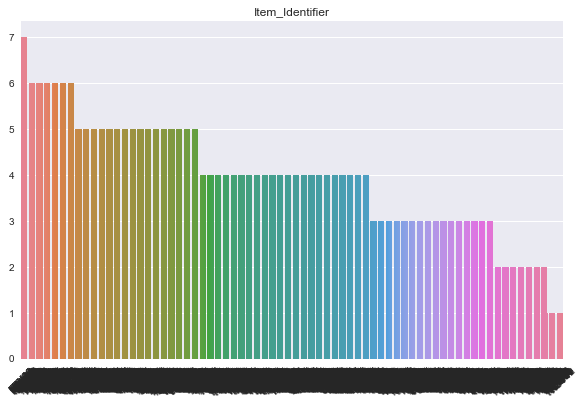

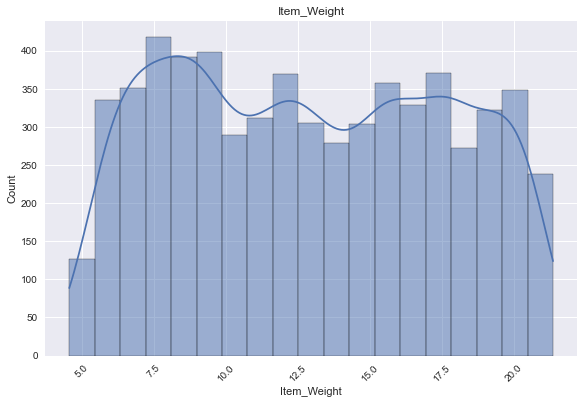

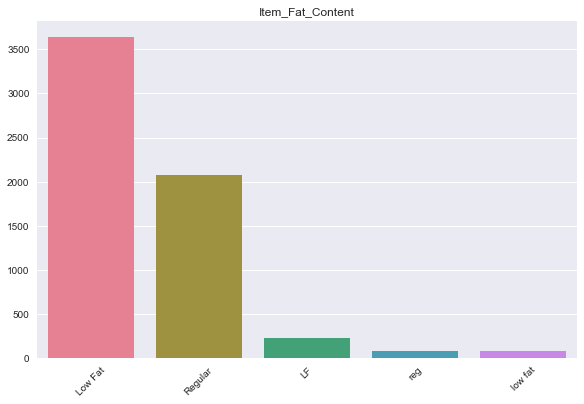

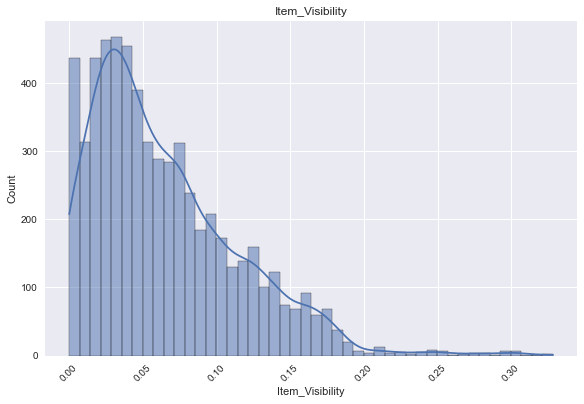

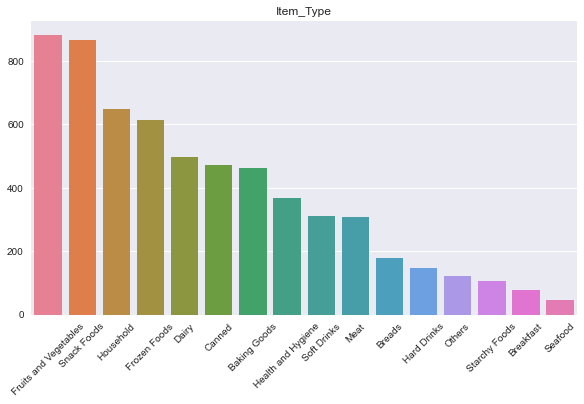

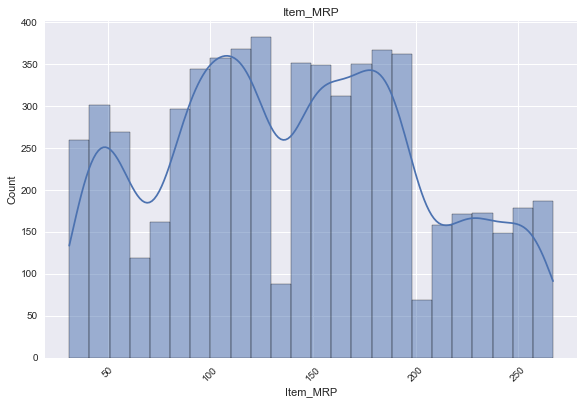

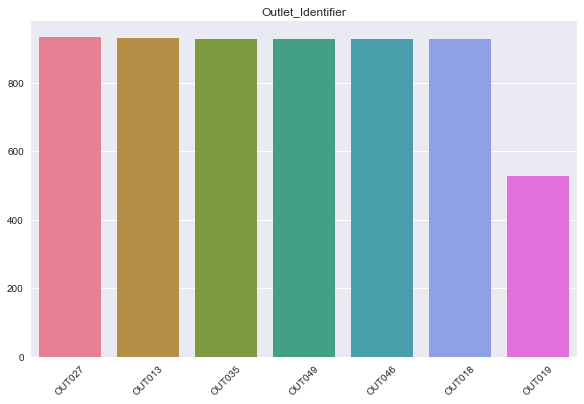

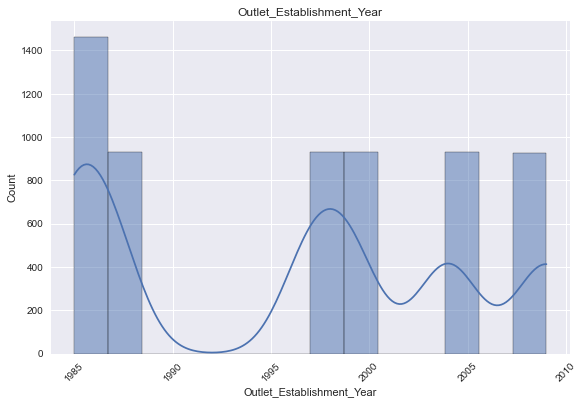

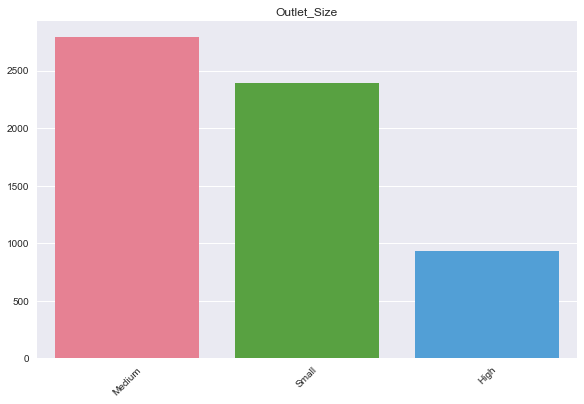

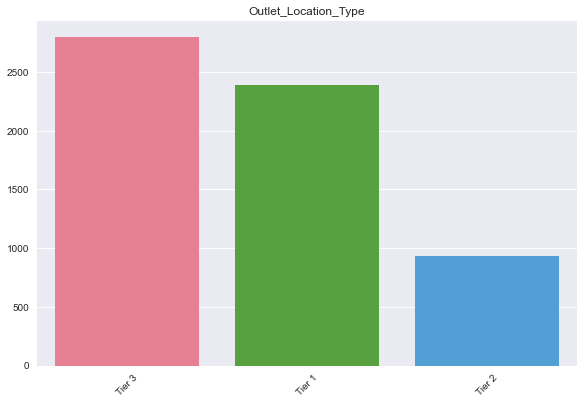

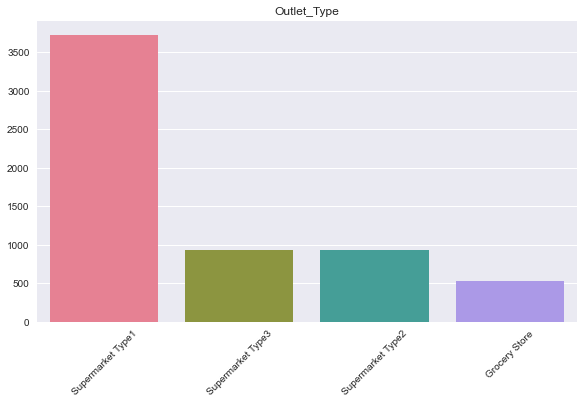

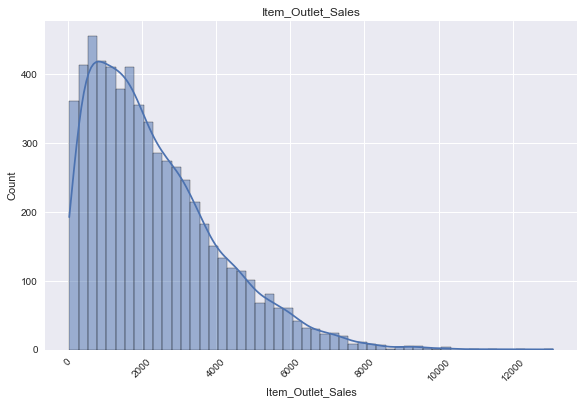

In [36]:
for i in range(len(data)):
        if predicciones_without_nan.dtypes[i] != 'object':
                sns.histplot(predicciones_without_nan[data['index'][i]],kde=True)
                plt.xticks(rotation=45)
                plt.title(data['index'][i])
                plt.show()
        else:
                obj=predicciones_without_nan[data['index'][i]].value_counts()
                sns.barplot(x=obj.index,y=obj.values,palette='husl')
                plt.xticks(rotation=45)
                plt.title(data['index'][i])

                plt.show()

### Generando boxplot

Viendo como se comportan los outlet sales por tipo de supermercado, localización, tamaño y tipo de producto

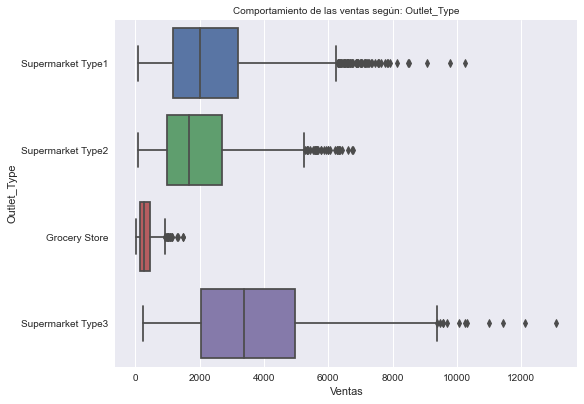

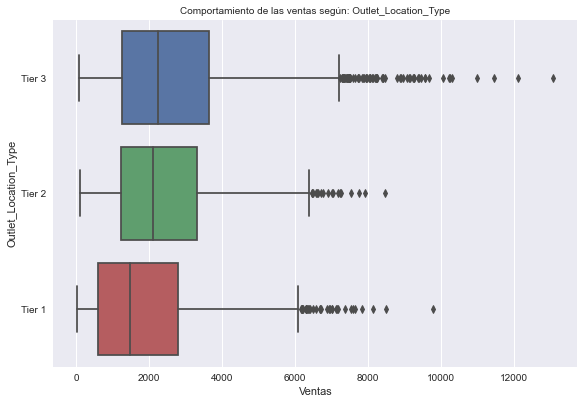

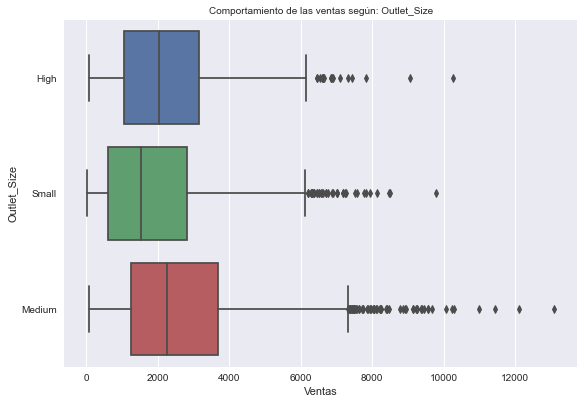

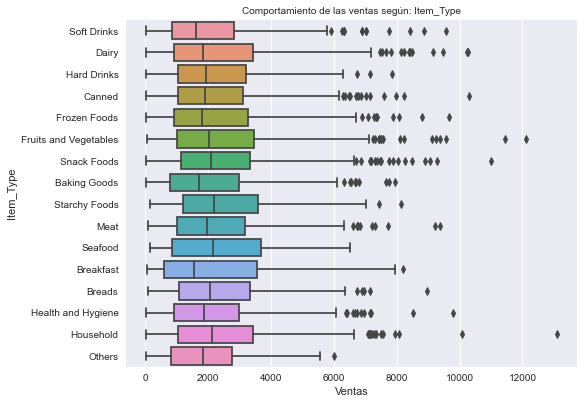

In [37]:
lista=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Type']

for i in range(len(lista)):
    ax1 = fig.add_subplot(len(lista),1,i+1)
    ax1=sns.boxplot(data=predicciones_without_nan,y=lista[i],x='Item_Outlet_Sales')
    ax1.set_xlabel('Ventas')
    ax1.set_ylabel(lista[i])
    titulo=lista[i]
    ax1.set_title(f'Comportamiento de las ventas según: {titulo}',fontsize=10)
    plt.show()

fig.tight_layout()
    

## Mapa de calor

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
import numpy as np

<AxesSubplot:>

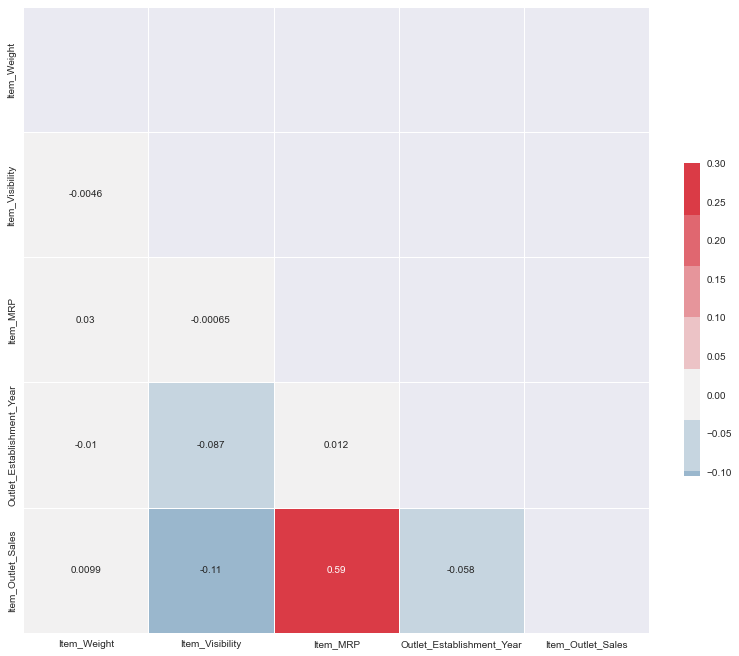

In [39]:
correlation= predicciones_without_nan.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

---
Para predecir las ventas y dado la magnitud de variables categoricas, si hacemos dummies en todas las variables, esto nos hará crecer el dataset de manera geometrica, por ente debemos escoger bien nuestras variables a convertir, por ende, se realizaran los siguientes modelos de predicción:

- Solo con item id
- con caracteristicas del item (item type e item fat content)
- con caracteristicas del outlet (outlet type, outlet location y outlet size)
- solo con el outlet id

por lo que se realizaran 4 subdataset donde cada uno tendrá su propio modelo

In [40]:
predicciones_without_nan.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
dummies_item_id=pd.get_dummies(data=predicciones_without_nan,columns=['Item_Identifier'])
dummies_item_id


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54
1245,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1693,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
7467,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,0,0
4900,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
6863,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,1
7738,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,0,1
7926,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,1
1896,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,...,0,0,0,0,0,0,0,0,0,1


In [42]:
del dummies_item_id['Item_Fat_Content'],dummies_item_id['Item_Type'],dummies_item_id['Outlet_Identifier'],dummies_item_id['Outlet_Size']

In [43]:
del dummies_item_id['Outlet_Location_Type'],dummies_item_id['Outlet_Type']

In [44]:
dummies_item_id

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54
1245,11.60,0.040912,142.3154,1987,2552.6772,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1693,11.60,0.000000,141.9154,2004,992.7078,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7467,11.60,0.041113,142.0154,2009,850.8924,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4900,19.35,0.039921,163.3868,2004,3439.5228,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6863,19.35,0.039990,165.0868,1999,982.7208,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,14.65,0.083359,161.9552,1997,4711.2008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7738,14.65,0.083699,163.4552,2009,2599.2832,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7926,14.65,0.083489,161.3552,1999,7148.0288,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1896,14.65,0.082956,164.0552,1985,5523.4768,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Ahora con la segunda categoria

In [45]:
dummies_item_caracteristicas=pd.get_dummies(data=predicciones_without_nan,columns=['Item_Fat_Content','Item_Type'])
dummies_item_caracteristicas.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods'],
      dtype='object')

In [ ]:
del dummies_item_caracteristicas['Outlet_Size']
del dummies_item_caracteristicas['Outlet_Location_Type'],dummies_item_caracteristicas['Outlet_Type']


In [119]:
del dummies_item_caracteristicas['Item_Identifier']

In [125]:
del dummies_item_caracteristicas['Outlet_Identifier']

In [126]:
dummies_item_caracteristicas

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
1245,11.60,0.040912,142.3154,1987,2552.6772,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1693,11.60,0.000000,141.9154,2004,992.7078,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7467,11.60,0.041113,142.0154,2009,850.8924,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4900,19.35,0.039921,163.3868,2004,3439.5228,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6863,19.35,0.039990,165.0868,1999,982.7208,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,14.65,0.083359,161.9552,1997,4711.2008,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7738,14.65,0.083699,163.4552,2009,2599.2832,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7926,14.65,0.083489,161.3552,1999,7148.0288,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1896,14.65,0.082956,164.0552,1985,5523.4768,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Con la tercera clasificación

In [48]:
dummies_outlet_caracteristicas=pd.get_dummies(data=predicciones_without_nan,columns=['Outlet_Size','Outlet_Location_Type','Outlet_Type'])
dummies_outlet_caracteristicas

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,2552.6772,1,0,0,0,0,1,0,1,0,0
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,992.7078,0,0,1,0,1,0,0,1,0,0
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,850.8924,0,1,0,0,0,1,0,0,1,0
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,3439.5228,0,0,1,0,1,0,0,1,0,0
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,982.7208,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,4711.2008,0,0,1,1,0,0,0,1,0,0
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,2599.2832,0,1,0,0,0,1,0,0,1,0
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,7148.0288,0,1,0,1,0,0,0,1,0,0
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,5523.4768,0,1,0,0,0,1,0,0,0,1


In [49]:
del dummies_outlet_caracteristicas['Item_Identifier'],dummies_outlet_caracteristicas['Item_Fat_Content'],dummies_outlet_caracteristicas['Item_Type']
del dummies_outlet_caracteristicas['Outlet_Identifier']
dummies_outlet_caracteristicas

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1245,11.60,0.040912,142.3154,1987,2552.6772,1,0,0,0,0,1,0,1,0,0
1693,11.60,0.000000,141.9154,2004,992.7078,0,0,1,0,1,0,0,1,0,0
7467,11.60,0.041113,142.0154,2009,850.8924,0,1,0,0,0,1,0,0,1,0
4900,19.35,0.039921,163.3868,2004,3439.5228,0,0,1,0,1,0,0,1,0,0
6863,19.35,0.039990,165.0868,1999,982.7208,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,14.65,0.083359,161.9552,1997,4711.2008,0,0,1,1,0,0,0,1,0,0
7738,14.65,0.083699,163.4552,2009,2599.2832,0,1,0,0,0,1,0,0,1,0
7926,14.65,0.083489,161.3552,1999,7148.0288,0,1,0,1,0,0,0,1,0,0
1896,14.65,0.082956,164.0552,1985,5523.4768,0,1,0,0,0,1,0,0,0,1


Con la cuarta clasificación

In [50]:
dummies_outlet_identifier=pd.get_dummies(data=predicciones_without_nan,columns=['Outlet_Identifier'])
dummies_outlet_identifier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_OUT013,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,1987,High,Tier 3,Supermarket Type1,2552.6772,1,0,0,0,0,0,0
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,2004,Small,Tier 2,Supermarket Type1,992.7078,0,0,0,0,1,0,0
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,2009,Medium,Tier 3,Supermarket Type2,850.8924,0,1,0,0,0,0,0
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,2004,Small,Tier 2,Supermarket Type1,3439.5228,0,0,0,0,1,0,0
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,1999,Medium,Tier 1,Supermarket Type1,982.7208,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,1997,Small,Tier 1,Supermarket Type1,4711.2008,0,0,0,0,0,1,0
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,2009,Medium,Tier 3,Supermarket Type2,2599.2832,0,1,0,0,0,0,0
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,1999,Medium,Tier 1,Supermarket Type1,7148.0288,0,0,0,0,0,0,1
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,1985,Medium,Tier 3,Supermarket Type3,5523.4768,0,0,0,1,0,0,0


In [51]:
del dummies_outlet_identifier['Item_Identifier'],dummies_outlet_identifier['Item_Fat_Content'],dummies_outlet_identifier['Item_Type']
del dummies_outlet_identifier['Outlet_Size'],dummies_outlet_identifier['Outlet_Location_Type'],dummies_outlet_identifier['Outlet_Type']

In [52]:
dummies_outlet_identifier

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Identifier_OUT013,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
1245,11.60,0.040912,142.3154,1987,2552.6772,1,0,0,0,0,0,0
1693,11.60,0.000000,141.9154,2004,992.7078,0,0,0,0,1,0,0
7467,11.60,0.041113,142.0154,2009,850.8924,0,1,0,0,0,0,0
4900,19.35,0.039921,163.3868,2004,3439.5228,0,0,0,0,1,0,0
6863,19.35,0.039990,165.0868,1999,982.7208,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,14.65,0.083359,161.9552,1997,4711.2008,0,0,0,0,0,1,0
7738,14.65,0.083699,163.4552,2009,2599.2832,0,1,0,0,0,0,0
7926,14.65,0.083489,161.3552,1999,7148.0288,0,0,0,0,0,0,1
1896,14.65,0.082956,164.0552,1985,5523.4768,0,0,0,1,0,0,0


Ahora se van a generar los modelos de predicción (Tanto de regresion lineal como de KNN) para cada una de estas categorias

Importando las librerias de sklearn

In [53]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

## Primera categoria

Regresor KNN primera categoria

In [54]:
X = dummies_item_id.drop(columns=['Item_Outlet_Sales']) 
y = dummies_item_id['Item_Outlet_Sales']

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [67]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.2543064434523573


In [68]:
from sklearn.model_selection import GridSearchCV

In [73]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=1)

In [74]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[-0.41866216 -0.04579937  0.08004403  0.1331684   0.16341165  0.17999283
  0.19159551  0.20359083  0.20972399  0.2111989   0.20911533  0.20612726
  0.19881205  0.19334634  0.18233293  0.17206838  0.15812139  0.14141746
  0.11970164  0.09947009  0.08220498  0.05881702  0.03979887  0.02401588
  0.00983339  0.0038637   0.00685125  0.01633424  0.02982461  0.04575818] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [75]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.2543064434523573


Validando el modelo

In [81]:
predictions = knn.predict(X_test)
print(r2_score(y_test, predictions))

0.22183765646707587


Regresor lineal primera categoria

In [84]:
X = dummies_item_id.drop(columns=['Item_Outlet_Sales']) 
y = dummies_item_id['Item_Outlet_Sales']

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [98]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

-2.534597538110495e+17


In [89]:
while (r2<=0.4):
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5) 
    lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_val)
    r2=r2_score(y_val, y_pred)
    print(r2)


0.09576780017467179
-7.511869407498145e+17
-6.288492365366805e+19
-3.489855830182245e+17
-2.1803828369863053e+19
-507083943574291.56
-3.7917706144208826e+17
-0.013148201458063724
-1.4832755382006884e+19


KeyboardInterrupt: 

Validando

In [99]:
predictions = lin_reg.predict(X_test)
print(r2_score(y_test, predictions))

0.04115136842109801


decision tree

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [104]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)
y_pred_tree=regressor.predict(X_val)
r2=r2_score(y_val, y_pred_tree)
print("R2=",r2)

R2= 0.3894283508357156


optimizando

In [101]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [102]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.24582826 0.31260603 0.33407832 0.34361954 0.33605186 0.33421012
 0.30519046 0.25764585 0.2155916  0.20254574] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [ ]:
X = dummies_item_id.drop(columns=['Item_Outlet_Sales']) 
y = dummies_item_id['Item_Outlet_Sales']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

Validando

In [105]:
validacion_tree=regressor.predict(X_test)
print(r2_score(y_test, validacion_tree))

0.37709956588027427


Random forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [107]:
rndf_rgr = RandomForestRegressor(n_estimators=150)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.2957924211114308

In [108]:
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_rgr = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_rgr, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [110]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.24816855 0.27599544 0.27474907 0.28099728 0.28204582 0.28297165
 0.28315748 0.28094492 0.28286113 0.282431   0.28387291] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [111]:
rndf_rgr = RandomForestRegressor(n_estimators=500)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.285362685722074

validando

In [112]:
validacion_forest=rndf_rgr.predict(X_test)
print(r2_score(y_test, validacion_forest))

0.3182307225319245


## Segunda Categoria

Los datos

In [127]:
X = dummies_item_caracteristicas.drop(columns=['Item_Outlet_Sales']) # Separación de las características
y = dummies_item_caracteristicas['Item_Outlet_Sales']

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [129]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

KNN regresor

In [138]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.303293638488232


optimizando

In [131]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=1)

In [133]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[-0.34533972  0.01040691  0.12412066  0.17661044  0.20040523  0.22244895
  0.23138186  0.2466898   0.25210777  0.25689927  0.26601961  0.26984643
  0.27243857  0.27357422  0.2738173   0.27250762  0.27164174  0.27102821
  0.27164307  0.27336307  0.27469543  0.27445624  0.27352276  0.27151564
  0.26965441  0.26731601  0.26528697  0.26309459  0.26254809  0.26107553] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [142]:
knn = KNeighborsRegressor(n_neighbors=21)
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.29669843826614384


validando

In [143]:
predictions = knn.predict(X_test)
print(r2_score(y_test, predictions))

0.2603984663519717


regresor lineal

In [144]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.3793718314028801


In [149]:
while (r2<=0.42):
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)
    lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_val)
    r2=r2_score(y_val, y_pred)
    print(r2)

0.3552406670861621
0.36631671510186614
0.3631860578051225
0.37287226898519854
0.37718203520310956
0.37014534145874756
0.3676396859384061
0.32751428564861795
0.343890270936134
0.36421800777287305
0.32434473012932263
0.337045961091745
0.33578958499068867
0.3700865806702831
0.32932009820791464
0.3183584143326792
0.38239498757883894
0.38280436092536296
0.3454243179569305
0.3840390425777058
0.37244749451610715
0.3422392906606364
0.3711364022445487
0.326893691559062
0.403622618631591
0.3531488206809137
0.38314076570835065
0.3341015596050403
0.3733118779669753
0.30607589570602345
0.38652401473567166
0.37058372464132505
0.39379106137775766
0.3250556620289463
0.38303461760831936
0.38496224566093296
0.3573485990786466
0.3756194225129835
0.3515127960937078
0.34756880782066424
0.3775528124091825
0.3758311194299455
0.3524803413473
0.3739312540129881
0.3732617086619284
0.3767705646416274
0.3879703947323735
0.3290643072806887
0.39266359944266416
0.34514516156301966
0.3988826145797437
0.37682764879502

validando el modelo

In [150]:
predictions = lin_reg.predict(X_test)
print(r2_score(y_test, predictions))

0.32843333642166617


Decision tree

In [151]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)
y_pred_tree=regressor.predict(X_val)
r2=r2_score(y_val, y_pred_tree)
print("R2=",r2)

R2= 0.43539723005663056


optimizando

In [152]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [153]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.23970322 0.29467073 0.31931927 0.33510886 0.33819858 0.31917886
 0.2808886  0.21135309 0.17701275 0.11089499] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [154]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)
y_pred_tree=regressor.predict(X_val)
r2=r2_score(y_val, y_pred_tree)
print("R2=",r2)

R2= 0.43218066434309454


Validando

In [156]:
validacion_tree=regressor.predict(X_test)
print(r2_score(y_test, validacion_tree))

0.3391732884692914


Random forest

In [157]:
rndf_rgr = RandomForestRegressor(n_estimators=150)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.3780795058423766

In [158]:
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_rgr = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_rgr, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [159]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.22593395 0.27888415 0.28312963 0.28194142 0.2888167  0.29016626
 0.28723842 0.28852756 0.28653544 0.28603197 0.2887093 ] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


validando

In [160]:
rndf_rgr = RandomForestRegressor(n_estimators=200)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.3895205532725108

In [161]:
validacion_forest=rndf_rgr.predict(X_test)
print(r2_score(y_test, validacion_forest))

0.2801951979441685


## Tercera categoria

Los datos

In [162]:
X = dummies_outlet_caracteristicas.drop(columns=['Item_Outlet_Sales']) # Separación de las características
y = dummies_outlet_caracteristicas['Item_Outlet_Sales']

In [163]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [164]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

KNN regresor

In [165]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.5423477421528083


optimizando

In [166]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=1)

In [168]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.15912194 0.38513604 0.4512333  0.49146711 0.5126056  0.51952932
 0.52865367 0.53474889 0.54248189 0.54596607 0.5501767  0.55315326
 0.556923   0.55818812 0.55704849 0.55903025 0.55911917 0.55990795
 0.56144298 0.56252213 0.56339565 0.56437921 0.56486072 0.5658177
 0.56692399 0.56713443 0.56685446 0.56838466 0.5681135  0.56795107] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [169]:
knn = KNeighborsRegressor(n_neighbors=28)
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.5605357771887367


validando

In [170]:
predictions = knn.predict(X_test)
print(r2_score(y_test, predictions))

0.6005057751639702


regresor lineal

In [171]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.5362227342389293


In [181]:
while (r2<=0.61):
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)
    lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_val)
    r2=r2_score(y_val, y_pred)
    print(r2)

0.5572850014391629
0.5879200661105024
0.56663663484693
0.5556229964907677
0.563817109033611
0.5842578048102649
0.5456547639797991
0.553791123395164
0.581410470778472
0.5190849182468293
0.5632004602683399
0.5690445352165265
0.570223440911074
0.5412351336424199
0.5083487709401098
0.5579766551260505
0.5724781052009781
0.5627458649996187
0.566182011551668
0.5651976293178302
0.5693752033120794
0.5368525754065194
0.5736497443831109
0.5373121965514873
0.5728530675849061
0.5723589364587895
0.5320532387717978
0.5642734156577792
0.5526624190700664
0.5607016146264998
0.5572468309973251
0.5787936282069872
0.5863923013979211
0.5641224621044578
0.6058189428594982
0.5681551178419109
0.5623101719821353
0.5603558424983517
0.5383403272333744
0.5436006811182826
0.5539452840614353
0.5797498554903073
0.5767180810892325
0.5506809896863051
0.5467536476104092
0.5698284862564049
0.5714444122415813
0.5507990099419218
0.5658552820887697
0.5797152689952263
0.5741464343768157
0.5619625194666127
0.5427898902200692


validando el modelo

In [185]:
predictions = lin_reg.predict(X_test)
print(r2_score(y_test, predictions))

0.5475399269560665


Decision tree

In [186]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)
y_pred_tree=regressor.predict(X_val)
r2=r2_score(y_val, y_pred_tree)
print("R2=",r2)

R2= 0.6333340373721364


optimizando

In [187]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [188]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.23810029 0.39226545 0.49046649 0.54193028 0.55519416 0.53741041
 0.52616622 0.49317185 0.46331534 0.4285794 ] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [189]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)
y_pred_tree=regressor.predict(X_val)
r2=r2_score(y_val, y_pred_tree)
print("R2=",r2)

R2= 0.6409503661539027


Validando

In [190]:
validacion_tree=regressor.predict(X_test)
print(r2_score(y_test, validacion_tree))

0.5610782130428478


Random forest

In [191]:
rndf_rgr = RandomForestRegressor(n_estimators=150)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.5951129689314134

In [192]:
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_rgr = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_rgr, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [193]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.47614934 0.52095183 0.52258538 0.52587525 0.52342098 0.52439863
 0.52658574 0.52527533 0.52516663 0.52632963 0.5262334 ] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [194]:
rndf_rgr = RandomForestRegressor(n_estimators=450)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.5955723460362471

validando

In [195]:
validacion_forest=rndf_rgr.predict(X_test)
print(r2_score(y_test, validacion_forest))

0.5328376643255472


## Cuarta Categoria

Los datos

In [196]:
X = dummies_outlet_identifier.drop(columns=['Item_Outlet_Sales']) 
y = dummies_outlet_identifier['Item_Outlet_Sales']

In [197]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [198]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

KNN regresor

In [199]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.5725910529593887


optimizando

In [200]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=1)

In [201]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.15248672 0.3814202  0.44733596 0.49651203 0.51535247 0.52819303
 0.53860941 0.54276824 0.54837689 0.55099359 0.55276965 0.55644901
 0.5573412  0.56027443 0.56115495 0.56380441 0.56516214 0.56535614
 0.56585104 0.5676284  0.56842485 0.56922597 0.57060546 0.57072966
 0.57011199 0.56953585 0.56940586 0.56974059 0.570165   0.5703464 ] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [202]:
knn = KNeighborsRegressor(n_neighbors=23)
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.5929410323375846


validando

In [203]:
predictions = knn.predict(X_test)
print(r2_score(y_test, predictions))

0.5461957568381891


regresor lineal

In [204]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.5801649653950969


In [205]:
while (r2<=0.61):
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)
    lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_val)
    r2=r2_score(y_val, y_pred)
    print(r2)

0.5446049975487388
0.5350277832577599
0.535891724471012
0.581881995533442
0.5381350811081057
0.54949741896494
0.5964187425313536
0.5349636085053563
0.5777203656162713
0.5722896841413752
0.5176311702551202
0.562970551196954
0.5669118463105473
0.5470953992347574
0.5644511216417625
0.5741922533431698
0.5521799816359132
0.5703600410975288
0.5509226429368541
0.5429066187825673
0.5508455946919779
0.5635573416067066
0.5780280742666777
0.5610658420063961
0.5564121471455252
0.513119006583741
0.5421661585326645
0.5345438398461007
0.5587425032518569
0.5749765576177398
0.5494513709769715
0.5617251718260647
0.5601649928528405
0.5629862559583892
0.5189717397190685
0.5316231732865325
0.5591363475042916
0.5794014374110477
0.5558772885610554
0.5806011914678603
0.5520737428849827
0.5749603718258318
0.5468970471024487
0.5724702442023755
0.5456756691196751
0.5327021596439712
0.5537890837277255
0.5691021911631409
0.5491856214717757
0.5354443611429456
0.5718723108035219
0.5787318253859348
0.558586771499644


validando el modelo

In [206]:
predictions = lin_reg.predict(X_test)
print(r2_score(y_test, predictions))

0.5797617602351615


Decision tree

In [207]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)
y_pred_tree=regressor.predict(X_val)
r2=r2_score(y_val, y_pred_tree)
print("R2=",r2)

R2= 0.6346384433475935


optimizando

In [208]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [209]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.24627839 0.38722976 0.47854387 0.53925651 0.55073669 0.53892598
 0.52431775 0.49275743 0.46314625 0.43585944] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [210]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)
y_pred_tree=regressor.predict(X_val)
r2=r2_score(y_val, y_pred_tree)
print("R2=",r2)

R2= 0.6465557147684715


Validando

In [211]:
validacion_tree=regressor.predict(X_test)
print(r2_score(y_test, validacion_tree))

0.6003683117117826


Random forest

In [212]:
rndf_rgr = RandomForestRegressor(n_estimators=150)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.6200489799422134

In [213]:
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_rgr = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_rgr, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [214]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.48997645 0.51853799 0.51955787 0.52147094 0.52542989 0.52575481
 0.52447974 0.52395418 0.52602727 0.52603491 0.52551554] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [215]:
rndf_rgr = RandomForestRegressor(n_estimators=450)
rndf_rgr.fit(X_train, y_train)
y_pred = rndf_rgr.predict(X_val)
r2_score(y_val,y_pred)

0.6262978092416571

validando

In [216]:
validacion_forest=rndf_rgr.predict(X_test)
print(r2_score(y_test, validacion_forest))

0.5651453986539738


## Conclusiones regresiones

Podemos darnos cuenta que en las regresiones existen descubrimientos impresionantes, donde claramente al separar nuestro data en 4 categorias nos dan valores muy distintos. 
en resumen:
Primer categoria
- KNN: 28%
- Regresion lineal: regresion negativa
segunda categoria
- KNN: 30%
- Regresion lineal: 40%
Tercera categoria
- KNN:60,04%
- Regresion lineal:60,3%
cuarta categoria
- KNN:60.9%
- Regresion lineal:59,7%

Es por eso que las caracteristicas que más influyen en las ventas no provienen de los productos, sino que provienen claramente de las caracteristicas de donde es vendido el producto.

En la validación de los modelos por categoria se obtiene lo siguiente

- primera categoria:
KNN 22,8%
Regresion 0,04%
Decision tree 37,7%
Random forest 31,8%
- Segunda categoria:
KNN 26,3% 
Regresion 32,8%
Decision tree 43,21%
Random forest 28,01%
- Tercera categoría:
KNN 60%
Regresion 54,75%
Decision tree 56,10%
Random forest 53,28%
- Cuarta categoría:
KNN 54,61%
Regresion 57,97%
Decision tree 60,03%
Random forest 56,61%